In [34]:
import pandas as pd

df = pd.read_csv('mediacompany.csv')
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [36]:
df.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
dtype: int64

In [37]:
df = df.drop('Unnamed: 7',axis=1)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [38]:
df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [40]:
for i in df.index.values: 
    df['Day'] = df.index.values+1
     
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Day                    80 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 5.1 KB


In [42]:
# Adding Weekday

df['weekday'] = (df['Day']+3)%7
df.weekday.replace(0,7,inplace=True)
df['weekday'] = df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


Running 1st time

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           8.01e-12
Time:                        21:50:51   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

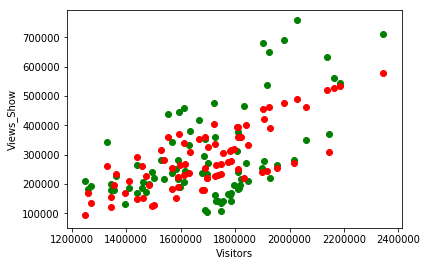

In [56]:
# Independent Variables
X = df[['Visitors','weekday']]

# Dependet Variable
y = df['Views_show']

from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lr_1 = sm.OLS(y,X).fit()

y_pred = lr_1.predict(X)
# Draw a plot of actual prices vs predicted prices by learned machine
import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['Visitors'],y,color='green')
plt.scatter(df['Visitors'],y_pred,color='red')

plt.xlabel('Visitors')
plt.ylabel('Views_Show')

# print the summary
print(lr_1.summary())

Running 2nd time

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     35.25
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.21e-14
Time:                        21:51:44   Log-Likelihood:                -1034.2
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.345e+04    9.8e+04      0.137      

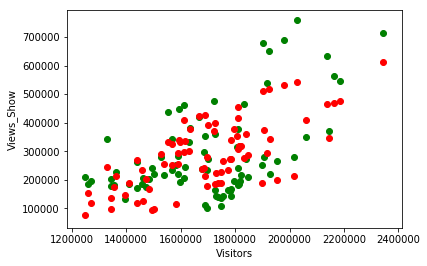

In [58]:
# Independent Variables
X = df[['Visitors','weekday','Character_A']]

# Dependet Variable
y = df['Views_show']

from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lr_2 = sm.OLS(y,X).fit()

y_pred = lr_2.predict(X)
# Draw a plot of actual prices vs predicted prices by learned machine
import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['Visitors'],y,color='green')
plt.scatter(df['Visitors'],y_pred,color='red')

plt.xlabel('Visitors')
plt.ylabel('Views_Show')
# print the summary
print(lr_2.summary())

running 3rd time

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     26.16
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           1.36e-13
Time:                        21:51:54   Log-Likelihood:                -1034.1
No. Observations:                  80   AIC:                             2078.
Df Residuals:                      75   BIC:                             2090.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7247.6907    

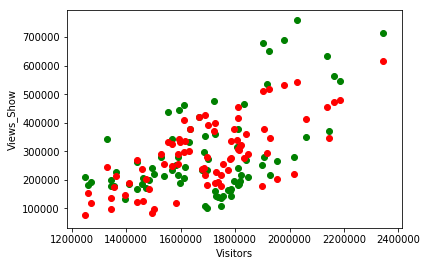

In [59]:
# Independent Variables
X = df[['Visitors','weekday','Character_A','Cricket_match_india']]

# Dependet Variable
y = df['Views_show']

from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lr_3 = sm.OLS(y,X).fit()

y_pred = lr_3.predict(X)
# Draw a plot of actual prices vs predicted prices by learned machine
import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['Visitors'],y,color='green')
plt.scatter(df['Visitors'],y_pred,color='red')

plt.xlabel('Visitors')
plt.ylabel('Views_Show')
# print the summary
print(lr_3.summary())

running 4th time 

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     32.45
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.30e-17
Time:                        21:52:06   Log-Likelihood:                -1022.6
No. Observations:                  80   AIC:                             2057.
Df Residuals:                      74   BIC:                             2072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.267e+05    

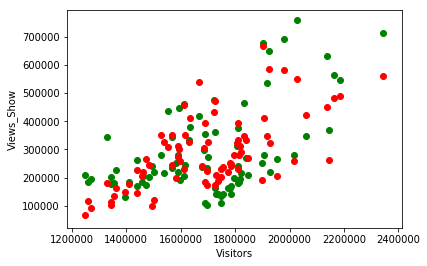

In [60]:
# Independent Variables
X = df[['Visitors','weekday','Character_A','Cricket_match_india','Ad_impression']]

# Dependet Variable
y = df['Views_show']

from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lr_4 = sm.OLS(y,X).fit()

y_pred = lr_4.predict(X)
# Draw a plot of actual prices vs predicted prices by learned machine
import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['Visitors'],y,color='green')
plt.scatter(df['Visitors'],y_pred,color='red')

plt.xlabel('Visitors')
plt.ylabel('Views_Show')
# print the summary
print(lr_4.summary())

running 5th time

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     28.18
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           3.59e-17
Time:                        21:52:15   Log-Likelihood:                -1021.1
No. Observations:                  80   AIC:                             2056.
Df Residuals:                      73   BIC:                             2073.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.993e+05   1

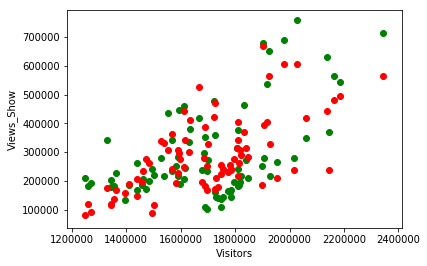

In [61]:
# Independent Variables
X = df[['Visitors','weekday','Character_A','Cricket_match_india','Ad_impression','Views_platform']]

# Dependet Variable
y = df['Views_show']

from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# fit the model to the training data
lr.fit(X,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lr_5 = sm.OLS(y,X).fit()

y_pred = lr_5.predict(X)
# Draw a plot of actual prices vs predicted prices by learned machine
import matplotlib.pyplot as plt

#plt.plot(df['lotsize'],df['price'],color='green')
plt.scatter(df['Visitors'],y,color='green')
plt.scatter(df['Visitors'],y_pred,color='red')

plt.xlabel('Visitors')
plt.ylabel('Views_Show')
# print the summary
print(lr_5.summary())